# Hotel booking demand，酒店预订需求

#### 3220190833 李杨晓

## 0.数据加载与预处理 

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(style="whitegrid")

#读取数据集
df=pd.read_csv("DA_input/hotel-booking-demand/hotel_bookings.csv")

### 0.1 属性分析

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

属性初步分析：

1.hotel--酒店类型，城市酒店City Hotel和假日酒店Resort Hotel

2.is_canceled--预订是否被取消

3.lead_time--提前预订时长（单位：天）

4.arrival_date_year--入住日期的年份

5.arrival_date_month--入住日期的月份

6.arrival_date_week_number--入住日期的周数

7.arrival_date_day_of_month--入住日期是当月第几天

8.stays_in_weekend_nights--客人入住或预定入住酒店的周末晚上数（周六或周日）

9.stays_in_week_nights--客人入住或预定入住酒店的工作日晚上数（周一至周五）

10.adults--成人数

11.children--儿童数

12.babies--婴儿数

13.meal--餐食预订，BB、HB、SC、Undefined、FB，Undefined/SC代表无餐饮套餐

14.country--预订源自哪个国家

15.market_segment--市场细分，哪种旅行社

16.distribution_channel--预订分销渠道

17.is_repeated_guest--是否是回头客

18.previous_cancellations--客户此前取消的预订数

19.previous_bookings_not_canceled--客户此前未取消的预定数

20.reserved_room_type--预订的房间类型代码

21.assigned_room_type--分配的房间类型的代码，有时分配的房间类型与预订的房间类型不同

22.booking_changes--预订之后所做的更改次数

23.deposit_type--客户是否为预订支付押金

24.agent--预订酒店的旅行社ID

25.company--进行预订或负责支付预订的公司/实体的ID

26.days_in_waiting_list--在向客户确认之前，预订在等待列表中的天数

27.customer_type--预订类型

28.adr--平均每日房价，定义为所有住宿交易的总和除以住宿总夜数

29.required_car_parking_spaces--客户要求的停车位数量

30.total_of_special_requests--客户提出的特殊要求总数

31.reservation_status--预订的最终状态

32.reservation_status_date--最终状态确立的日期。此变量可与Reservation Status结合使用，以了解预订何时取消或客户何时退房

In [5]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


数据集中包含来自两种不同酒店的预订数据，度假酒店和城市酒店，共119390条记录。预订记录的时间跨度为从2015年7月1日到2017年8月31日。

### 0.2 数据缺失值与异常值处理

In [6]:
#查看数据缺失情况
df.isnull().sum()[df.isnull().sum()!=0]

children         4
country        488
agent        16340
company     112593
dtype: int64

缺失值处理：

共有4项信息存在缺失——

1.company缺失值较多，且对本次分析作用不大，直接删除

2.agent缺失代表未指定代理机构，用0填充

3.country缺失值用Unknown填充

4.children缺失值用0填充

In [7]:
#缺失值处理
df.drop("company", axis=1, inplace=True)

df["agent"].fillna(0, inplace=True)
df["children"].fillna(0.0, inplace=True)
df["country"].fillna("Unknown", inplace=True)

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

meal属性中的“Undefined”与“SC”意义相同，所以进行替换——

In [9]:
#meal属性值同义替换
df["meal"].replace("Undefined", "SC", inplace=True)

In [10]:
df["meal"].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

数据异常值的处理：

数据集中存在入住人数adults、children、babies均为0的情况，这是异常的。所以将总人数（adults+children+babies)为0的记录删除——

In [11]:
#异常值处理
zero_guests = list(df["adults"]
                   + df["children"]
                   + df["babies"]==0)

df.drop(df.index[zero_guests], inplace=True)

In [12]:
df.shape

(119210, 31)

对原始数据进行缺失值和异常值处理后，还剩119210条记录，31列。


## 2.基本情况：城市酒店和度假酒店的预订需求和入住率比较 

In [13]:
base = df.copy()

#整体入住情况分析
base["is_canceled"] = base["is_canceled"].astype(object)
base["is_canceled"].replace(0, "入住", inplace=True)
base["is_canceled"].replace(1, "取消", inplace=True)

total_booking = base["is_canceled"].value_counts()

In [15]:
fig = px.pie(total_booking,
             values=total_booking.values,
             names=total_booking.index,
             title="整体入住情况",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="value+percent+label")
fig.show()

整体来看，两家酒店所有的预订中，取消率为37.1%，入住率为62.9%

In [16]:
#预订需求对比
booking = base["hotel"].value_counts()

fig = px.pie(booking,
             values=booking.values,
             names=booking.index,
             title="两种酒店的预订需求比较",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="value+percent+label")
fig.show()

预订需求对比：

城市酒店的预订量占全部预订的66.4%，度假酒店占33.6%

In [17]:
#from plotly.subplots import make_subplots

#入住率对比
rh = base[base['hotel']=='Resort Hotel']
ch = base[base['hotel']=='City Hotel']

#fig = make_subplots(rows=1, cols=2)

rh_checkin = rh["is_canceled"].value_counts()
fig = px.pie(rh_checkin,
             values=rh_checkin.values,
             names=rh_checkin.index,
             title="度假酒店入住情况",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="value+percent+label")
fig.show()

ch_checkin = ch["is_canceled"].value_counts()
fig = px.pie(ch_checkin,
             values=ch_checkin.values,
             names=ch_checkin.index,
             title="城市酒店入住情况",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="value+percent+label")
fig.show()

饼图能够更直观地对比两家酒店的入住情况。

度假酒店的入住率为72%，高于城市酒店的58%。

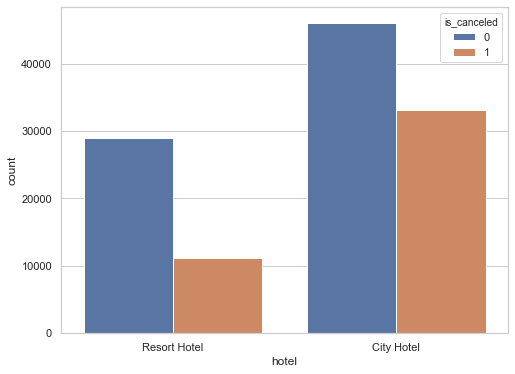

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.show()

入住情况对比：

从数量上来看，度假酒店的预订量、入住数、取消数都相应地少于城市酒店。（0代表入住，1代表取消）

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



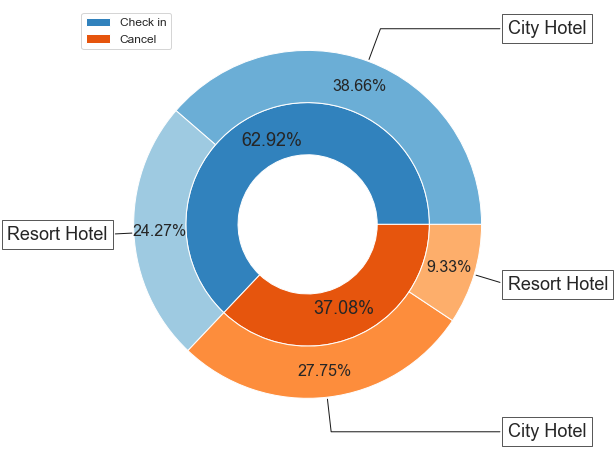

In [19]:
#横向对比
#参考链接：https://blog.csdn.net/qq_34069667/article/details/105676958
rh_iscancel_count = df[df["hotel"]=="Resort Hotel"].groupby(["is_canceled"])["is_canceled"].count()
ch_iscancel_count = df[df["hotel"]=="City Hotel"].groupby(["is_canceled"])["is_canceled"].count()

rh_cancel_data = pd.DataFrame({"hotel": "度假酒店",
                              "is_canceled": rh_iscancel_count.index,
                              "count": rh_iscancel_count.values})

ch_cancel_data = pd.DataFrame({"hotel": "城市酒店",
                              "is_canceled": ch_iscancel_count.index,
                              "count": ch_iscancel_count.values})
iscancel_data = pd.concat([rh_cancel_data, ch_cancel_data], ignore_index=True)
plt.figure(figsize=(12, 8))

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap(np.array([1, 2, 5, 6]))

w , t, at = plt.pie(df["is_canceled"].value_counts(), autopct="%.2f%%",textprops={"fontsize":18},
                   radius=0.7, wedgeprops=dict(width=0.3), pctdistance=0.75, colors=outer_colors)
plt.legend(w, ["Check in", "Cancel"], loc="upper right", bbox_to_anchor=(0, 0, 0.2, 1), fontsize=12)


val_array = np.array((iscancel_data.loc[(iscancel_data.hotel=="城市酒店")&(iscancel_data.is_canceled==0), "count"].values,
       iscancel_data.loc[(iscancel_data.hotel=="度假酒店")&(iscancel_data.is_canceled==0), "count"].values,
       iscancel_data.loc[(iscancel_data.hotel=="城市酒店")&(iscancel_data.is_canceled==1), "count"].values,
       iscancel_data.loc[(iscancel_data.hotel=="度假酒店")&(iscancel_data.is_canceled==1), "count"].values))

w2, t2, at2 = plt.pie(val_array, autopct="%.2f%%",textprops={"fontsize":16}, radius=1,
       wedgeprops=dict(width=0.3), pctdistance=0.85, colors=inner_colors)
#plt.title("两种酒店入住情况横向对比", fontsize=16)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-", color="k"), bbox=bbox_props, zorder=3, va="center")
for i, p in enumerate(w2):
#     print(i, p, sep="---")
    text = ["City Hotel", "Resort Hotel", "City Hotel", "Resort Hotel"]
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle, angleA=0, angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(text[i], xy=(x, y), xytext=(1.15*np.sign(x), 1.2*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=18)

另一种对比方案——

参考链接：https://blog.csdn.net/qq_34069667/article/details/105676958

环形图中显示了在全部的入住数和取消数中，城市酒店和度假酒店各占到多少。

## 2. 用户行为分析

### 2.1 提前预订时长

In [135]:
#划分数据集，便于分析

#入住/取消
check_in = df[df["is_canceled"]==0]
cancel = df[df["is_canceled"]==1]

#度假酒店/城市酒店
res = df[df['hotel']=='Resort Hotel']
cty = df[df['hotel']=='City Hotel']

#度假酒店入住/城市酒店入住
res_checkin = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
cty_checkin = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [146]:
df["lead_time"].value_counts().head(30)

0     6264
1     3445
2     2065
3     1815
4     1710
5     1563
6     1444
7     1329
8     1138
12    1079
11    1054
9      991
10     974
14     964
16     941
17     879
19     837
15     836
34     828
18     826
13     821
28     820
20     750
40     722
29     712
22     707
32     690
31     683
21     678
56     676
Name: lead_time, dtype: int64

In [147]:
df['lead_time'].describe()

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

关于提前入住时长，频数排在前30位的绝大多数都在50天以内。

很大部分客户的提前预订时长为0，最长的时间为提前737天预订。

结合频数分布柱状图来看——

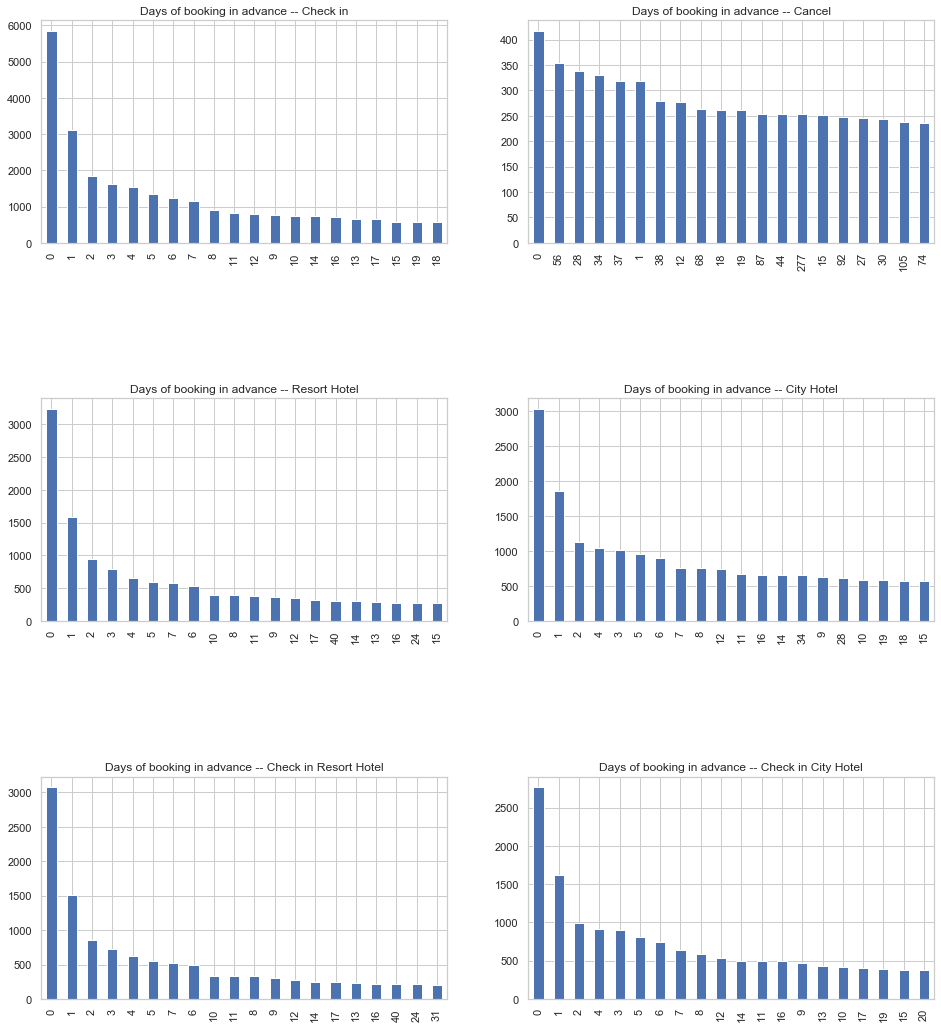

In [145]:
#频数分布柱状图
plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3,2,1)
plt.title('Days of booking in advance -- Check in')
check_in['lead_time'].value_counts().head(20).plot.bar() 

plt.subplot(3,2,2)
plt.title('Days of booking in advance -- Cancel')
cancel['lead_time'].value_counts().head(20).plot.bar()

plt.subplot(3,2,3)
plt.title('Days of booking in advance -- Resort Hotel')
res['lead_time'].value_counts().head(20).plot.bar()

plt.subplot(3,2,4)
plt.title('Days of booking in advance -- City Hotel')
cty['lead_time'].value_counts().head(20).plot.bar()

plt.subplot(3,2,5)
plt.title('Days of booking in advance -- Check in Resort Hotel')
res_checkin['lead_time'].value_counts().head(20).plot.bar()

plt.subplot(3,2,6)
plt.title('Days of booking in advance -- Check in City Hotel')
cty_checkin['lead_time'].value_counts().head(20).plot.bar()

对比入住数据集与取消数据集，可以发现：客户提前20天以内预订并入住的情况最多，而客户提前预订时长较长时易于取消。

城市酒店与度假酒店提前预订时长的高频数分布大致相同，均在1-2周左右。

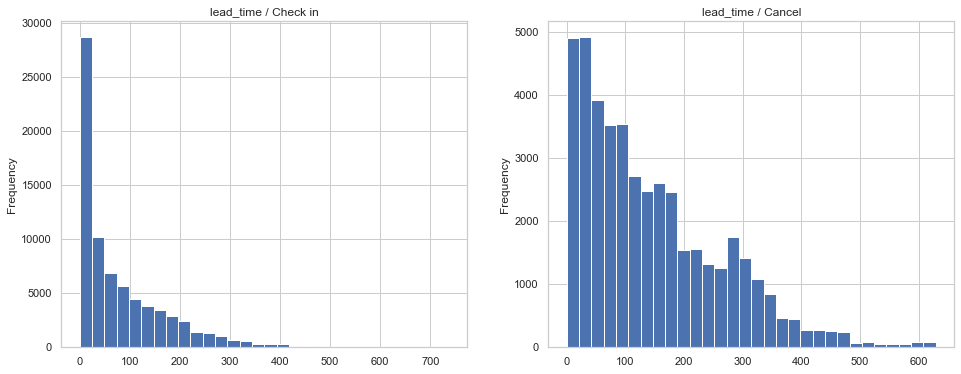

In [144]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
check_in['lead_time'].plot(kind='hist', title='lead_time / Check in', bins=30)

plt.subplot(1,2,2)
cancel['lead_time'].plot(kind='hist', title='lead_time / Cancel', bins=30)

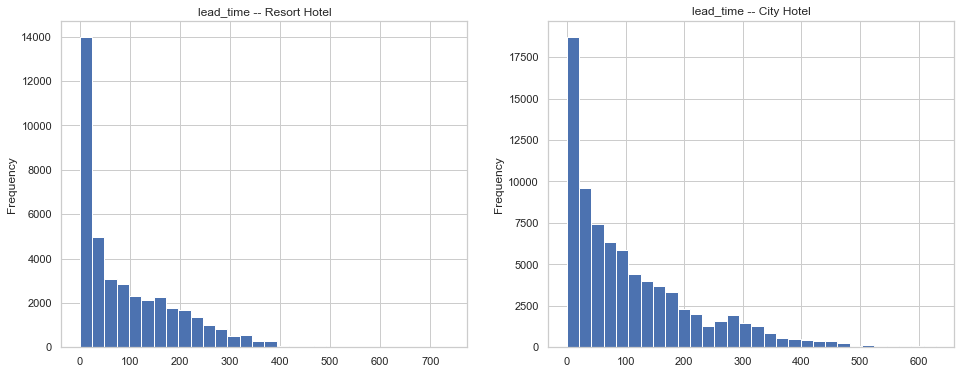

In [143]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
res['lead_time'].plot(kind='hist', title='lead_time -- Resort Hotel', bins=30)

plt.subplot(1,2,2)
cty['lead_time'].plot(kind='hist', title='lead_time -- City Hotel', bins=30)

观察提前预订时长的频数分布直方图，可以得到与刚才相同的结论——预订时间越早，越容易取消预订。

城市酒店的提前预订时长跨度大于度假酒店。

### 2.2 入住时长

In [148]:
#只考虑入住数据
rh = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

# 提取出入住时长相关数据
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # 转换为百分比

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

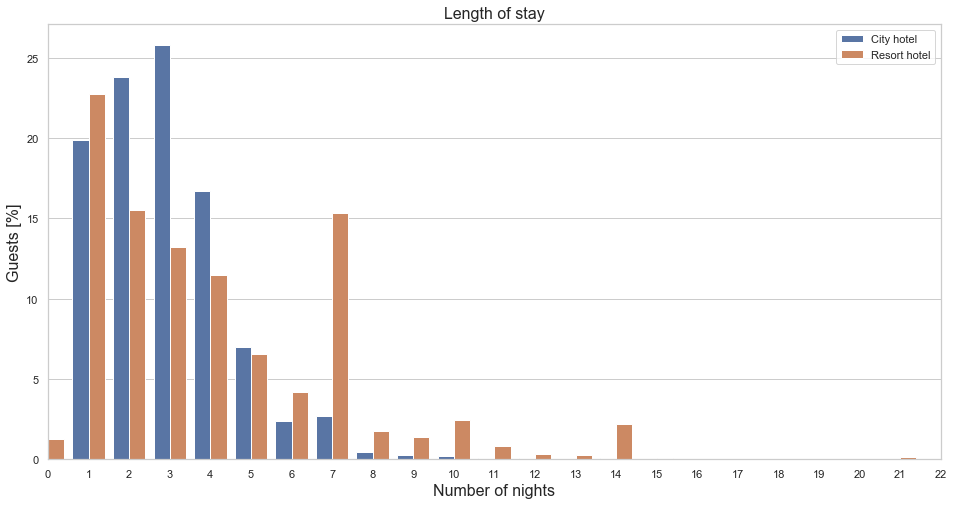

In [149]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

对于城市酒店，客户入住时长一般在1-4晚居多；对于度假酒店，除了1-4晚以外，入住7晚的情况也比较常见。

### 2.3 预订间隔

In [55]:
df["days_in_waiting_list"].value_counts()

0      115517
39        227
58        164
44        141
31        127
        ...  
37          1
109         1
52          1
72          1
74          1
Name: days_in_waiting_list, Length: 127, dtype: int64

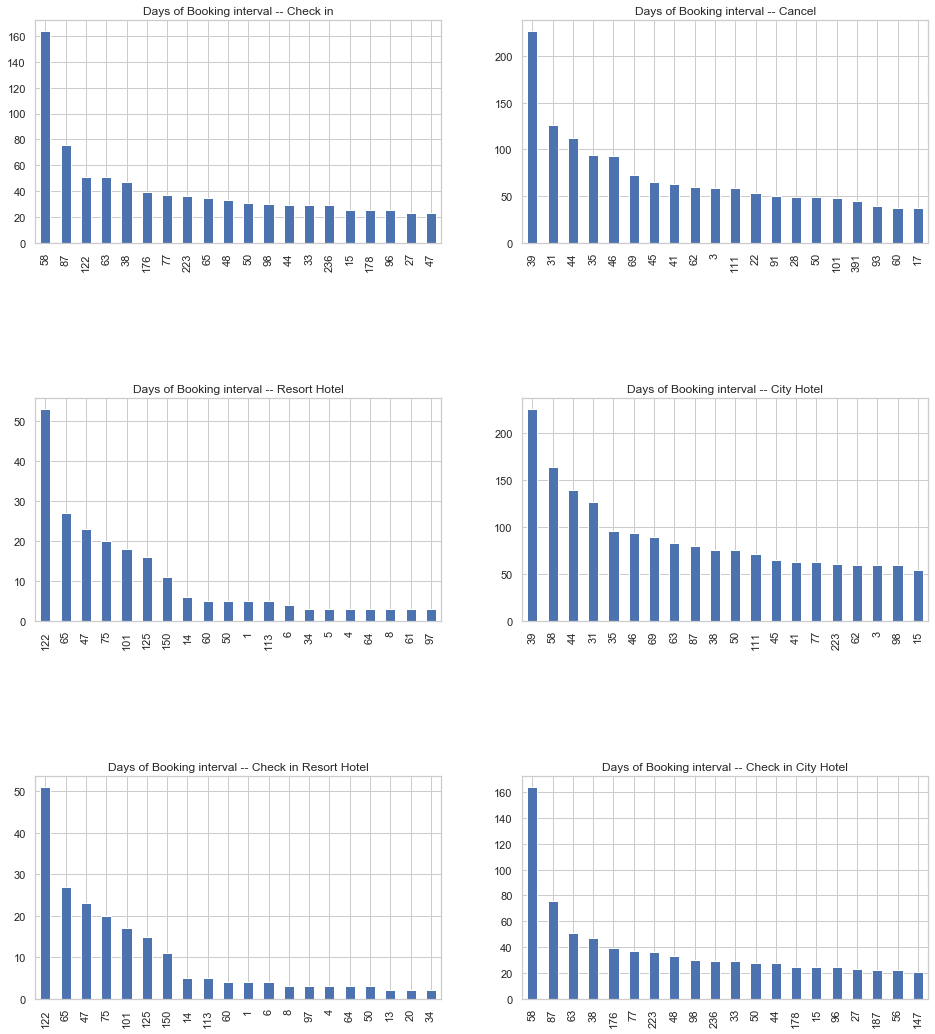

In [155]:
#频数分布柱状图
plt.figure(figsize=(16,18))
plt.subplots_adjust(hspace=0.7)

plt.subplot(3,2,1)
plt.title('Days of Booking interval -- Check in')
check_in[check_in['days_in_waiting_list'] > 0]['days_in_waiting_list'].value_counts().head(20).plot.bar() 

plt.subplot(3,2,2)
plt.title('Days of Booking interval -- Cancel')
cancel[cancel['days_in_waiting_list'] > 0]['days_in_waiting_list'].value_counts().head(20).plot.bar()

plt.subplot(3,2,3)
plt.title('Days of Booking interval -- Resort Hotel')
res[res['days_in_waiting_list'] > 0]['days_in_waiting_list'].value_counts().head(20).plot.bar()

plt.subplot(3,2,4)
plt.title('Days of Booking interval -- City Hotel')
cty[cty['days_in_waiting_list'] > 0]['days_in_waiting_list'].value_counts().head(20).plot.bar()

plt.subplot(3,2,5)
plt.title('Days of Booking interval -- Check in Resort Hotel')
res_checkin[res_checkin['days_in_waiting_list'] > 0]['days_in_waiting_list'].value_counts().head(20).plot.bar()

plt.subplot(3,2,6)
plt.title('Days of Booking interval -- Check in City Hotel')
cty_checkin[cty_checkin['days_in_waiting_list'] > 0]['days_in_waiting_list'].value_counts().head(20).plot.bar()

预订间隔：暂且理解为从用户提交预订到酒店确认之间的时长。

从整体频数来看，绝大部分预订都在当天得到了确认。

排除掉这一普遍情况，再观察频数分布柱状图，对于取消的预订，处理的间隔相对较短。

度假酒店的预订间隔相比于城市酒店分布更离散。

两者入住与取消的预订处理时长均遵循整体的规律，即对于取消的预订，处理预订的间隔相对较短。

### 2.4 餐食预订

In [156]:
#考虑全部预订数据
rh = df.loc[(df["hotel"] == "Resort Hotel")]
ch = df.loc[(df["hotel"] == "City Hotel")]

# 提取出餐食预订相关数据
meal_res = list(rh["meal"].value_counts().index)
num_meal_res = list(rh["meal"].value_counts())
rel_meal_res = rh["meal"].value_counts() / sum(num_meal_res) * 100 # 转换为百分比

meal_cty = list(ch["meal"].value_counts().index)
num_meal_cty = list(ch["meal"].value_counts())
rel_meal_cty = ch["meal"].value_counts() / sum(num_meal_cty) * 100 

res_meals = pd.DataFrame({"hotel": "Resort hotel",
                           "meal_booking": meal_res,
                           "rel_num_bookings": rel_meal_res})

cty_meals = pd.DataFrame({"hotel": "City hotel",
                           "meal_booking": meal_cty,
                           "rel_num_bookings": rel_meal_cty})

meal_data = pd.concat([res_meals, cty_meals], ignore_index=True)

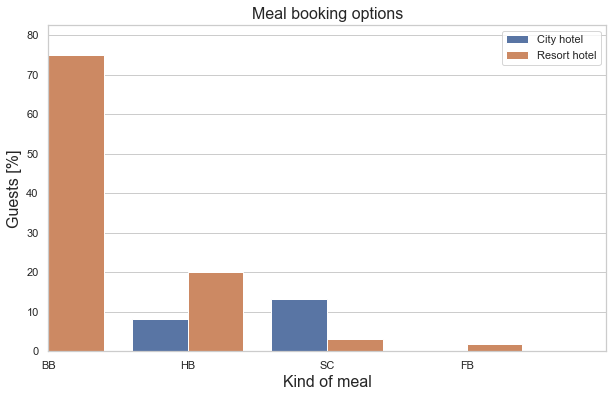

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(x = "meal_booking", y = "rel_num_bookings", hue="hotel", data=meal_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Meal booking options", fontsize=16)
plt.xlabel("Kind of meal", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,4)
plt.show()

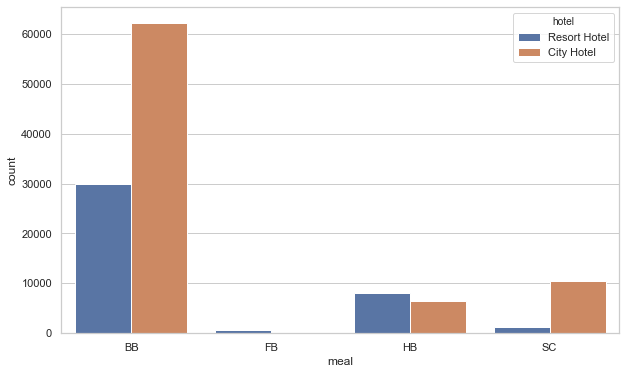

In [163]:
plt.figure(figsize = (10,6))
sns.countplot(x='meal',hue = 'hotel',data=base)

度假酒店的客户在预订餐食时，超7成会选择BB（住宿+早餐），另外三种餐饮也会有小部分客户选择。

城市酒店的客户也是选择BB较多，没有用户会选择FB（全餐）。

## 3. 一年中最佳预订酒店时间

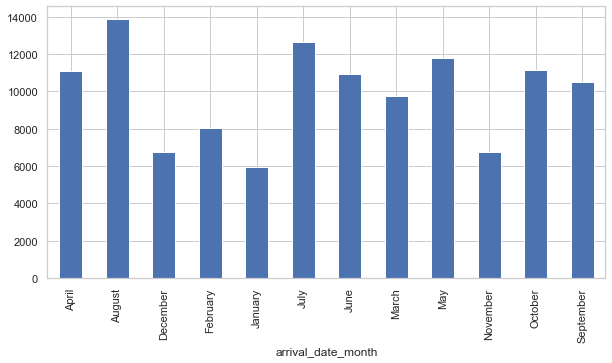

In [133]:
#整体的月度人流量
plt.figure(figsize = (10,5))
base.groupby(['arrival_date_month'])['arrival_date_month'].count().plot.bar()

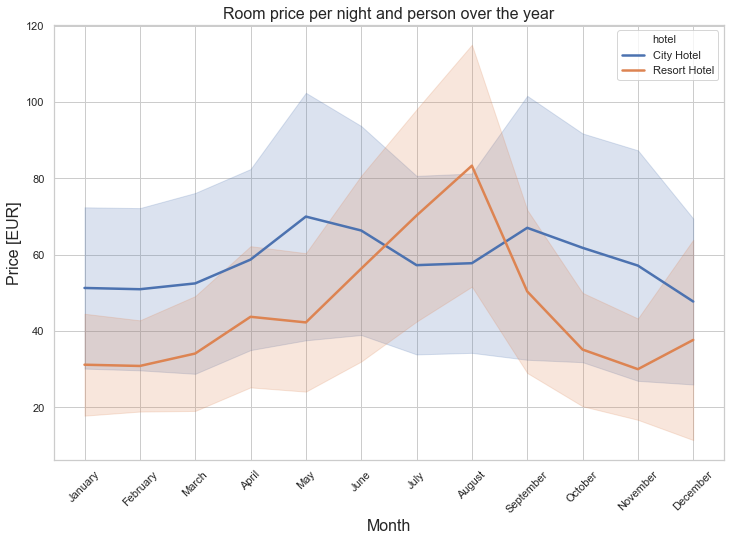

In [65]:
#考虑实际入住情况
#平均价格
df["adr_pp"] = df["adr"] / (df["adults"] + df["children"])
full_data_guests = df.loc[df["is_canceled"] == 0]
rh = df.loc[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df.loc[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

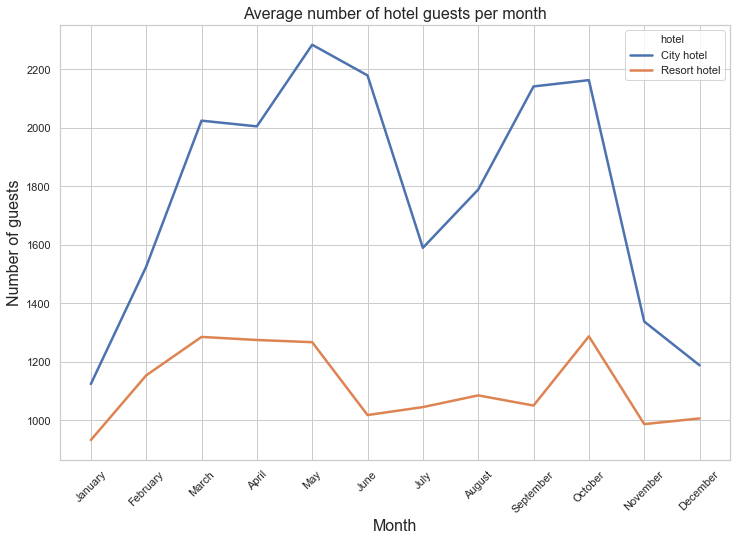

In [66]:
#月度人流量
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

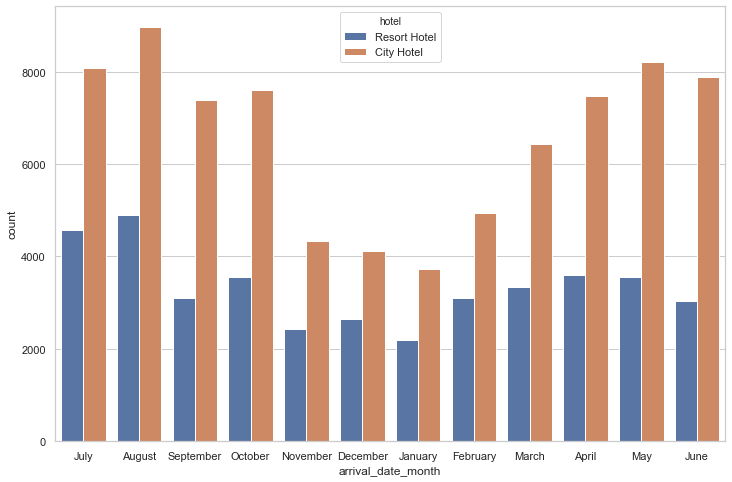

In [164]:
plt.figure(figsize = (12,8))
sns.countplot(x='arrival_date_month',hue = 'hotel',data=base)

结合两家酒店每个月的平均价格和每个月的人流量来看：

在春秋两季城市酒店价格虽然高，但其入住人数一点也没降低，处于旺季，入住旅客多且价格高；

而度假酒店在6-9月份游客数并不多，处于淡季，但这个时间段内的价格却在持续上升，远高于其他月份；

不论是城市酒店还是度假酒店，11月-1月冬季的价格都是全年中最低的，且人数最少。

选择在这个时间段内预订酒店会是最划算的，且酒店不会人满为患，能够得到较好的房型以及更好的服务。

## 4.利用Logistic预测酒店预订

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv("DA_input/hotel-booking-demand/hotel_bookings.csv")

df.drop(['agent','company','country'],inplace=True, axis=1)
df['children'].fillna(0,inplace=True)
#df['children']=df['children'].astype('int')

In [67]:
cat=df.select_dtypes(include='object').columns
cat

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [95]:
#使用Label Encoder对非数字项进行编码
encode = LabelEncoder()
df['arrival_date_month'] = encode.fit_transform(df['arrival_date_month'])
df['meal'] = encode.fit_transform(df['meal'])
df['market_segment'] = encode.fit_transform(df['market_segment'])
df['distribution_channel'] = encode.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = encode.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = encode.fit_transform(df['assigned_room_type'])
df['deposit_type'] = encode.fit_transform(df['deposit_type'])
df['customer_type'] = encode.fit_transform(df['customer_type'])
df['reservation_status'] = encode.fit_transform(df['reservation_status'])

#使用map函数将year转换为编码值
df['arrival_date_year'] = df['arrival_date_year'].map({2015:1, 2016:2, 2017:3})

#缩小lead_time和adr的映射范围
scaler = MinMaxScaler()
df['lead_time'] = scaler.fit_transform(df['lead_time'].values.reshape(-1,1))
df['adr'] = scaler.fit_transform(df['adr'].values.reshape(-1,1))

In [96]:
#计算相关系数
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
is_canceled,1.000000,0.293123,0.016660,-0.001491,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,...,-0.061282,-0.176028,-0.144381,0.468634,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196
lead_time,0.293123,1.000000,0.040142,0.086228,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,...,-0.106089,-0.172219,0.000149,0.375667,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175
arrival_date_year,0.016660,0.040142,1.000000,-0.251837,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,...,0.092809,0.036141,0.030872,-0.064714,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683
arrival_date_month,-0.001491,0.086228,-0.251837,1.000000,0.302228,-0.017938,-0.031869,-0.025746,-0.058284,-0.082862,...,-0.062791,-0.038134,-0.017854,0.068173,0.048357,0.012029,-0.109004,-0.018589,-0.053047,-0.001611
arrival_date_week_number,0.008148,0.126871,-0.540561,0.302228,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,...,-0.007997,-0.005684,0.005508,0.003891,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,-0.017938,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,...,0.016929,0.011646,0.010613,-0.001358,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460
stays_in_weekend_nights,-0.001791,0.085671,0.021497,-0.031869,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,...,0.142083,0.086643,0.063281,-0.111435,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558
stays_in_week_nights,0.024765,0.165799,0.030883,-0.025746,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,...,0.168616,0.100795,0.096209,-0.076788,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607
adults,0.060017,0.119519,0.029635,-0.058284,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,...,0.211434,0.144779,-0.051673,-0.027644,-0.008283,-0.101756,0.230641,0.014785,0.122884,-0.071802
children,0.005036,-0.037613,0.054636,-0.082862,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,...,0.378064,0.327644,0.048952,-0.096078,-0.033271,-0.053400,0.324853,0.056255,0.081736,-0.003399


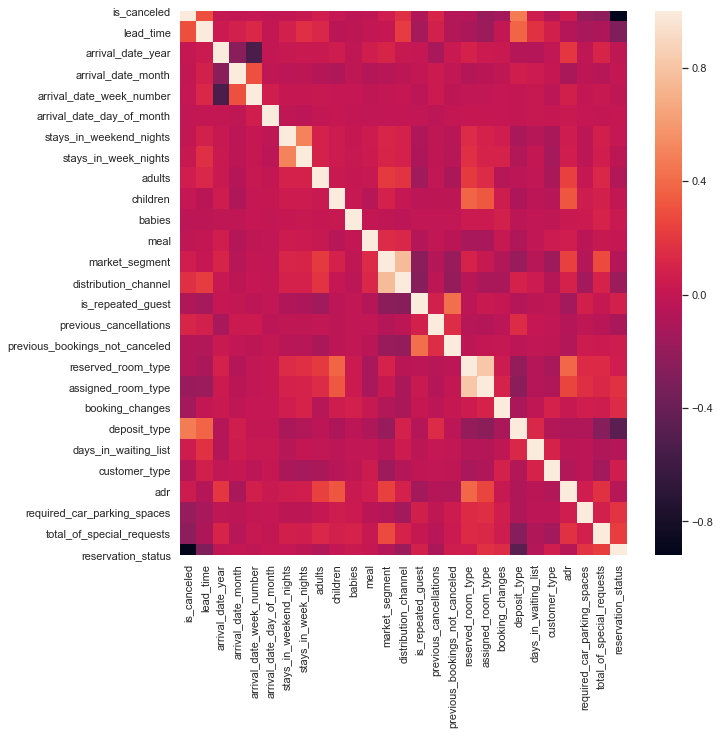

In [97]:
#热图
plt.figure(figsize = (10,10))
sns.heatmap(df.corr())

In [98]:
#选取与is_canceled相关性较强的属性
data = df[['reservation_status','total_of_special_requests','required_car_parking_spaces',
           'deposit_type','booking_changes','assigned_room_type','previous_cancellations',
           'distribution_channel','lead_time','is_canceled']]

#划分数据集
X = data.drop(['is_canceled'],axis= 1)
y = data['is_canceled']

In [99]:
#Logistics回归
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred = logreg.predict(X_test)

In [101]:
#准确率
accuracy = logreg.score(X_test,y_test)
print(accuracy)

0.9900745456068347


In [102]:
#混淆矩阵
matrix = confusion_matrix(y_test, y_pred.round())
matrix

array([[15237,    23],
       [  214,  8404]], dtype=int64)

In [103]:
#预测结果
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [107]:
df.loc[y_test.index]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
70376,City Hotel,1,0.069199,3,6,24,16,0,2,2,...,0,0,0,0,2,0.030775,0,1,0,2017-04-27
46713,City Hotel,0,0.016282,2,4,3,16,2,3,1,...,0,0,0,0,2,0.010044,0,0,1,2016-01-21
63981,City Hotel,1,0.469471,3,3,8,25,2,1,3,...,3,0,0,0,2,0.022322,0,0,0,2016-03-17
52745,City Hotel,1,0.088195,2,6,24,10,3,7,1,...,0,0,0,0,2,0.031228,0,0,0,2016-05-16
98792,City Hotel,0,0.348711,2,10,41,2,2,1,2,...,0,0,0,0,2,0.020824,0,3,1,2016-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27374,Resort Hotel,0,0.210312,2,1,35,22,1,5,2,...,0,0,0,0,2,0.032624,0,2,1,2016-08-28
74379,City Hotel,1,0.383989,1,5,31,27,1,1,2,...,0,0,1,0,0,0.012648,0,0,0,2015-01-01
36840,Resort Hotel,0,0.028494,3,8,22,28,2,1,2,...,3,0,0,0,2,0.027445,0,3,1,2017-05-31
95749,City Hotel,0,0.043419,2,1,35,21,2,1,2,...,4,0,0,0,2,0.026617,0,0,1,2016-08-24


In [110]:
result=pd.DataFrame()
result['Hotel Name']=df.loc[y_test.index].hotel
result['Booking_Possibility']=y_pred

#将结果存储为csv文件
result.to_csv('pred.csv')

In [112]:
result

,Hotel Name,Booking_Possibility
70376,City Hotel,1
46713,City Hotel,0
63981,City Hotel,1
52745,City Hotel,1
98792,City Hotel,0
...,...,...
27374,Resort Hotel,0
74379,City Hotel,1
36840,Resort Hotel,0
95749,City Hotel,0
